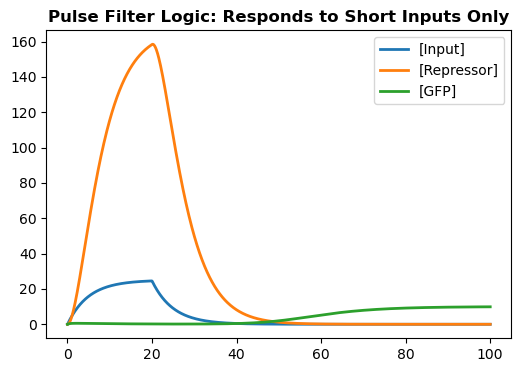

In [4]:
import tellurium as te

model = te.loada("""
model pulse_filter
// Species
Input = 0;
Repressor = 0;
GFP = 0;
                 
// Parameters
k_input = 5; // Input strength
k_decay_input = 0.2; // Input degradation
k_rep = 2; // Input makes repressor fast
k_deg_rep = 0.3; // Repressor degrades
k_prod_GFP = 1; // GFP production (inversely linked to repressor)
k_deg_GFP = 0.1; // GFP degradation

// Reactions
J0: -> Input; (time < 20)*k_input // Pulse input before t = 20
J1: Input -> ; k_decay_input*Input // Input degrades over time
J2: -> Repressor ; k_rep*Input // Repressor produced by input
J3: Repressor -> ; k_deg_rep*Repressor // Repressor degrades
J4: -> GFP; k_prod_GFP/(1+Repressor) // GFP only formed when repressor is low
J5: GFP -> ; k_deg_GFP*GFP // GFP breaks down
end
""")

model.simulate(0, 100, 1000)
model.plot(title="Pulse Filter Logic: Responds to Short Inputs Only")